# Topic Modeling in Python: Latent Dirichlet Allocation (LDA)

How to get started with topic modeling using LDA in Python

Source:  https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [1]:
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

# 1. Loading data

# Importing modules
import pandas as pd
# import os

# os.chdir('..')

# Read data into papers
papers = pd.read_csv('data/NIPS Papers/papers.csv')

# Print head
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [2]:
# 2. Data cleaning

# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4771,1991,A Cortico-Cerebellar Model that Learns to Gene...,Abstract Missing,A Cortico-Cerebellar Model that Learns to\nGen...
4857,2014,Orbit Regularization,We propose a general framework for regularizat...,Orbit Regularization\n\nAndr?e F. T. Martins?\...
587,1998,Maximum Conditional Likelihood via Bound Maxim...,Abstract Missing,Maximum Conditional Likelihood via\nBound Maxi...
881,2000,Recognizing Hand-written Digits Using Hierarch...,Abstract Missing,Recognizing Hand-written Digits Using\nHierarc...
701,1999,Correctness of Belief Propagation in Gaussian ...,Abstract Missing,Correctness of belief propagation in Gaussian\...


In [3]:
# Remove punctuation/lower casing

# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

4771    a cortico-cerebellar model that learns to\ngen...
4857    orbit regularization\n\nandre f t martins\nins...
587     maximum conditional likelihood via\nbound maxi...
881     recognizing hand-written digits using\nhierarc...
701     correctness of belief propagation in gaussian\...
Name: paper_text_processed, dtype: object

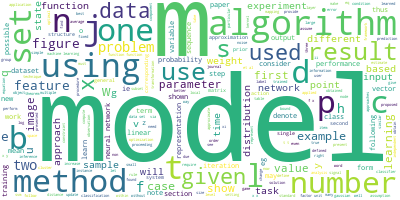

In [4]:
# 3. Exploratory analysis

# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [5]:
# 4. Preparing data for LDA analysis

# !pip install gensim

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print (data_words)

print(data_words[:1][0][:30])

c:\users\tonja\appdata\local\programs\python\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tonja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['cortico', 'cerebellar', 'model', 'learns', 'generate', 'distributed', 'motor', 'commands', 'control', 'kinematic', 'arm', 'ne', 'berthier', 'sp', 'singh', 'ag', 'barto', 'department', 'computer', 'science', 'university', 'massachusetts', 'amherst', 'tc', 'honk', 'department', 'physiology', 'northwestern', 'university', 'medical', 'school', 'chicago', 'il', 'abstract', 'based', 'model', 'presented', 'controls', 'simulated', 'kinematic', 'arm', 'goal', 'directed', 'reaches', 'network', 'generates', 'quasi', 'feedforward', 'motor', 'command', 'learned', 'using', 'training', 'signals', 'generated', 'corrective', 'movements', 'target', 'network', 'selects', 'sets', 'output', 'subset', 'pattern', 'generators', 'movement', 'feedback', 'proprioceptors', 'turns', 'pattern', 'generators', 'task', 'facing', 'individual', 'pattern', 'generators', 'recognize', 'arm', 'reaches', 'target', 'turn', 'distributed', 'representation', 'motor', 'command', 'resembles', 'population', 'vectors', 'seen', 'v

In [6]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 3), (8, 5), (9, 20), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 4), (23, 1), (24, 1), (25, 1), (26, 7), (27, 2), (28, 1), (29, 2)]


In [7]:
# 5. LDA model training

from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"model" + 0.005*"learning" + 0.005*"algorithm" + 0.004*"data" + '
  '0.004*"set" + 0.004*"using" + 0.004*"function" + 0.004*"models" + '
  '0.003*"training" + 0.003*"figure"'),
 (1,
  '0.009*"model" + 0.006*"function" + 0.005*"using" + 0.005*"algorithm" + '
  '0.004*"set" + 0.004*"learning" + 0.004*"data" + 0.003*"models" + '
  '0.003*"used" + 0.003*"distribution"'),
 (2,
  '0.006*"data" + 0.005*"learning" + 0.005*"using" + 0.005*"set" + '
  '0.005*"model" + 0.004*"algorithm" + 0.004*"function" + 0.004*"two" + '
  '0.004*"figure" + 0.004*"used"'),
 (3,
  '0.006*"model" + 0.005*"data" + 0.005*"learning" + 0.004*"function" + '
  '0.004*"one" + 0.004*"models" + 0.004*"algorithm" + 0.003*"using" + '
  '0.003*"set" + 0.003*"figure"'),
 (4,
  '0.006*"model" + 0.006*"learning" + 0.005*"models" + 0.005*"data" + '
  '0.004*"function" + 0.004*"algorithm" + 0.004*"using" + 0.004*"set" + '
  '0.003*"time" + 0.003*"training"'),
 (5,
  '0.005*"learning" + 0.005*"function" + 0.005*"mode

In [16]:
# 6. Analyzing LDA model results

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 


# Visualize the topics
pyLDAvis.enable_notebook()

# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open('results/ldavis_prepared_'+str(num_topics), 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open('results/ldavis_prepared_'+str(num_topics), 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, 'results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

c:\users\tonja\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.009756  0.002374       1        1  19.239839
2      0.003111  0.005290       2        1  15.699797
1     -0.003707  0.003534       3        1  14.979741
3     -0.004774  0.001725       4        1   9.552696
9      0.002164 -0.007384       5        1   9.042375
5     -0.009645  0.000352       6        1   8.405993
4      0.000626  0.002746       7        1   7.867653
6      0.001036  0.001264       8        1   6.757066
7     -0.001092 -0.006374       9        1   4.248045
0      0.002524 -0.003527      10        1   4.206795, topic_info=           Term         Freq        Total Category  logprob  loglift
401    learning  1395.000000  1395.000000  Default  30.0000  30.0000
443       model  1513.000000  1513.000000  Default  29.0000  29.0000
285    function  1129.000000  1129.000000  Default  28.0000  28.0000
27    algorithm  1027.000000  1027.000000  Default  27.0000  27.0000
188        data  1286.000000  1286.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
306       given    23.617993   654.666817  Topic10  -6.0740  -0.1536
2247  inference    20.192174   447.961269  Topic10  -6.2307   0.0691
812      vector    19.788628   433.055913  Topic10  -6.2509   0.0827
793         two    22.637781   690.146498  Topic10  -6.1164  -0.2488
1302    methods    20.626109   528.659412  Topic10  -6.2095  -0.0753

[861 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
5049       2  0.278337       abeles
5049       3  0.278337       abeles
5049       8  0.278337       abeles
9878       1  0.147782  abstraction
9878       2  0.295563  abstraction
...      ...       ...          ...
13126      8  0.155770          zid
12583      1  0.152105           zs
12583      3  0.152105           zs
12583      4  0.152105           zs
12583      7  0.152105           zs

[3986 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 3, 2, 4, 10, 6, 5, 7, 8, 1])